<div>  
<h1><center style="background-color:#374982; color:white;"><strong>Steam Games Data EDA</strong></center></h1>
</div>



<div>  
<h3><center style="background-color:#374982; color:white;"><strong>
Steam is a video game digital distribution service by Valve. It was launched as a standalone software client in September 2003 as a way for Valve to provide automatic updates for their games, and expanded to include games from third-party publishers.
</strong></center></h3>
</div>


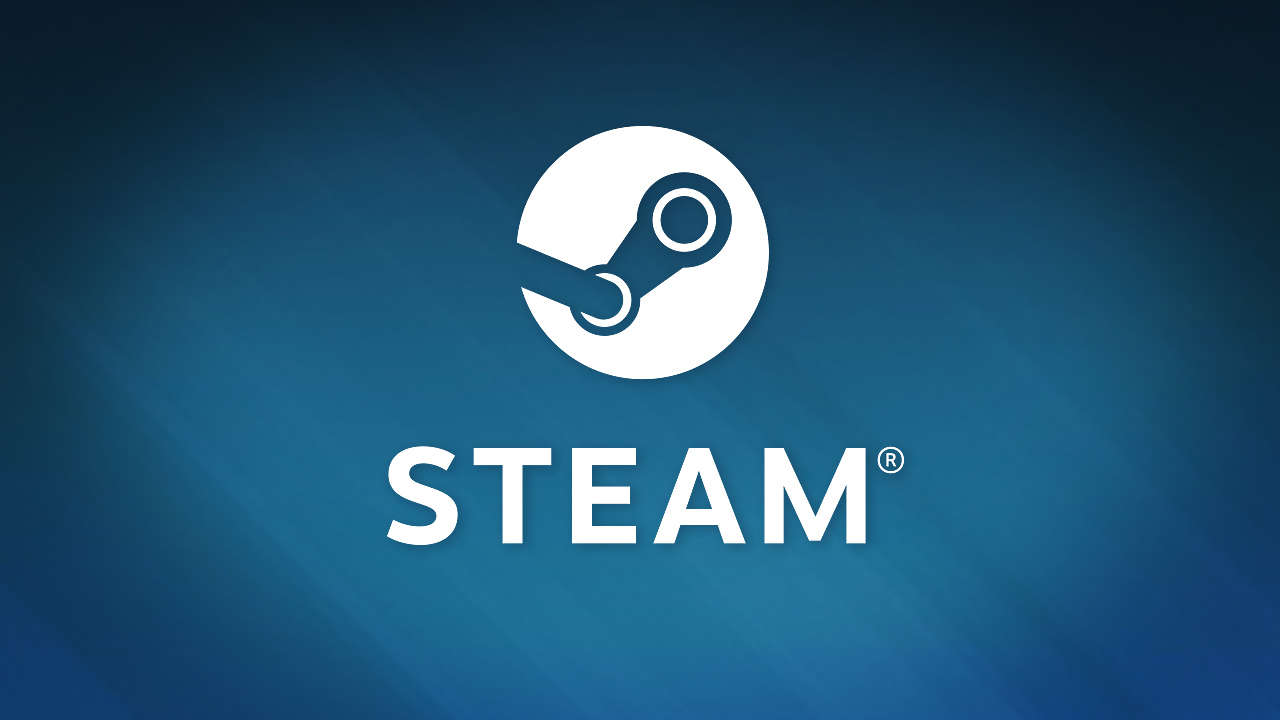

# Let's start

This dataset consists of Games related information such as most number of streams on Steam platform for a game, average number of streams and gain in streams.
Here stream means number of players, playing that specific game at that time. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('../input/popularity-of-games-on-steam/SteamCharts.csv',encoding= 'unicode_escape')
data.head()

In [ ]:
print("Number of rows : {0}".format(data.shape[0]))
print("Number of Unique games : {0}".format(len(data.gamename.unique())))

In [ ]:
#check for missing values
msno.matrix(data);

**Here only gain shows different missing values pattern then others means we have few missing values in gains column.**

In [ ]:
# Visualize the number of missing values as a bar chart
msno.bar(data);

**This bar chart gives you an idea about how many missing values are there in each column. "gain" is only column that has some missing values in it.**

In [ ]:
top_games = data.groupby(['gamename']).agg({'peak': 'sum'}).reset_index()
top_games.columns = ['gamename', 'peak_sum']
top_games = top_games.sort_values('peak_sum',ascending=False)

In [ ]:
fig = px.bar(top_games[:10], x='gamename', y='peak_sum', color='gamename', title='Top Games based on total sum of their streams')
fig.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/en/0/0b/Dota_2_%28Steam_2019%29.jpg",
        xref="paper", yref="paper",
        x=0.15, y=0.95,
        sizex=0.15, sizey=0.20,
        opacity=0.55,
        xanchor="right", yanchor="bottom"
    )
)

fig.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/en/6/6e/CSGOcoverMarch2020.jpg",
        xref="paper", yref="paper",
        x=0.19, y=0.65,
        sizex=0.5, sizey=0.30,
        opacity=0.55,
        xanchor="right", yanchor="bottom"
    )
)

fig.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/en/3/3d/PlayerUnknown%27s_Battlegrounds_Steam_Logo.jpg",
        xref="paper", yref="paper",
        x=0.29, y=0.55,
        sizex=0.5, sizey=0.30,
        opacity=0.55,
        xanchor="right", yanchor="bottom"
    )
)

fig.show()

**As expected top 3 games are most popular online games out there but difference between <span style="color:blue">Dota 2</span> and <span style="color:red">CS:GO</span> is huge.** 

**<span style="color:orange">PUBG</span> is very popular and maybe if was introduced back in 2012 around the same time as CS:GO it might be even more popular than <span style="color:blue">Dota 2</span> and <span style="color:red">CS:GO</span>.**

In [ ]:
values = data.nlargest(200,['peak']).gamename.value_counts().sort_values(ascending=False)
labels = values.index
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.title("Games with highest peaks")
plt.xlabel("Game Name")
plt.ylabel("Number of highest peaks")
sns.barplot(x=labels, y=values)

**<span style="color:blue">Dota 2</span>, <span style="color:red">CS:GO</span> and <span style="color:orange">PUBG</span> are topping as expected and there are some games like Cyberpunk, Fallout 4 which produced one of the largest peaks on release days but were not able to keep it up because these games were buggy and not very well optimized at the time of release.**

**Now as we know that <span style="color:blue">Dota 2</span> is one of the most popular game then let's look at how it evolved over time.**

In [ ]:
dota_2 = data[data.gamename=='Dota 2']
dota_2 = dota_2.sort_values(by='year',ascending=True)
dota_2.head()

In [ ]:
fig = px.line(dota_2, x="year", y="peak", title='Change in peak for DOTA 2 over the time')
fig.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/en/0/0b/Dota_2_%28Steam_2019%29.jpg",
        xref="paper", yref="paper",
        x=0.70, y=0.1,
        sizex=0.55, sizey=0.50,
        opacity=0.35,
        xanchor="right", yanchor="bottom"
    )
)
fig.show()

**Seems like Dota 2 started as low as 75k peak but from then it kept on increasing to it's all time best of 1.29M in 2016. After that it saw some decline in 2017 onwards but gamers still liked it and that's why it stayed between 0.6M to 0.8M for so long.**

In [ ]:
dota_2012 = dota_2[dota_2.year==2012].sort_index(ascending=False)

fig = px.line(dota_2012, x="month", y="peak", title='Change in peak for DOTA 2 in 2012')
fig.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/en/0/0b/Dota_2_%28Steam_2019%29.jpg",
        xref="paper", yref="paper",
        x=0.70, y=0.1,
        sizex=0.55, sizey=0.50,
        opacity=0.35,
        xanchor="right", yanchor="bottom"
    )
)
fig.show()

**Let's compare it with CS:GO and see how they were competing back in 2012.**

In [ ]:
csgo = data[data.gamename=='Counter-Strike: Global Offensive']
csgo = csgo.sort_values(by='year',ascending=True)

fig = px.line(csgo, x="year", y="peak", title='Change in peak for CS:GO over the time')
fig.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/en/6/6e/CSGOcoverMarch2020.jpg",
        xref="paper", yref="paper",
        x=0.60, y=0.1,
        sizex=0.75, sizey=0.70,
        opacity=0.35,
        xanchor="right", yanchor="bottom"
    )
)
fig.show()

**CS:GO produced it's all time highest streams in 2020, most likely due to a global lockdown.**

In [ ]:
csgo_2012 = csgo[csgo.year==2012].sort_index(ascending=False)
#csgo_2012

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dota_2012["month"], y=dota_2012["peak"],name='Dota 2'))
fig.add_trace(go.Scatter(x=csgo_2012["month"], y=csgo_2012["peak"],name='CS:GO'))
fig.show()


**From the above plot, it is clear that there was some difference between Dota 2 and CS:GO and Dota 2 was way ahead of CS:GO.**
**One other game that is very popular and was very much competitive to CS:GO and Dota 2 is PUBG let's see how it performed from it's release.**

In [ ]:
pubg = data[data.gamename=="PLAYERUNKNOWN'S BATTLEGROUNDS"]
pubg = pubg.sort_values(by='year',ascending=True)

In [ ]:
fig = px.line(pubg, x="year", y="peak", title='Change in peak for PUBG over the time')
fig.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/en/3/3d/PlayerUnknown%27s_Battlegrounds_Steam_Logo.jpg",
        xref="paper", yref="paper",
        x=0.60, y=0.1,
        sizex=0.75, sizey=0.70,
        opacity=0.35,
        xanchor="right", yanchor="bottom"
    )
)
fig.show()

**In it's initial time, pubg broke all records and reached all time best peak of 3.2M, but after that it lost some fanbase, and reason for that be availability of PUBG's mobile app.** \
**But let's how it evolved in it's initial months?**

In [ ]:
pubg_2017 = pubg[pubg.year==2017].sort_index(ascending=False)

fig = px.line(pubg_2017, x="month", y="peak", title='Change in peak for PUBG in 2017')
fig.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/en/3/3d/PlayerUnknown%27s_Battlegrounds_Steam_Logo.jpg",
        xref="paper", yref="paper",
        x=0.65, y=0.1,
        sizex=0.75, sizey=0.70,
        opacity=0.35,
        xanchor="right", yanchor="bottom"
    )
)
fig.show()

**Let's compare top 3 games evolution in initial months**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=pubg_2017["month"], y=pubg_2017["peak"],name='PUBG'))
fig.add_trace(go.Scatter(x=dota_2012["month"], y=dota_2012["peak"],name='Dota 2'))
fig.add_trace(go.Scatter(x=csgo_2012["month"], y=csgo_2012["peak"],name='CS:GO'))
fig.show()

In [ ]:
new_data = data[data['gamename'].isin(labels)]
new_data = new_data.sort_values(by='year',ascending=True)
new_data.head()

In [ ]:
new_data_2020 = new_data[new_data.year==2020]
new_data_2020 = new_data_2020.sort_index(ascending=False)
fig = px.line(new_data_2020, x="month", y="peak", color='gamename')
fig.show()

**Above graph shows peak of some famous game during LockDown year 2020.**

In [ ]:
fig = px.line(new_data, x="year", y="gain", color='gamename',title='Change in streams gain over time')
fig.show()

In [ ]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(new_data['gain'],fit=norm,kde=False, color=['green'])
plt.title('Distplot with Normal distribution for Games',fontweight="bold")
plt.show()

In [ ]:
data = data.sort_values(by='year')

In [ ]:
years_data = data.drop_duplicates('gamename')
years_data.shape

In [ ]:
years_data.year.unique()

In [ ]:
years_data = years_data['year'].value_counts().reset_index().rename(columns = {'year' : 'count'}).sort_values('index')

In [ ]:
t1 = go.Scatter(x=years_data['index'], y=years_data["count"], name="Games", marker=dict(color="royalblue"))

data2 = [t1]

layout = go.Layout(title="New Games introduced over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data2, layout=layout)
fig.show()

**2012 was one of the best year for gamers as it had highest number of game releases.**

**Future work : Add some animation plots.**